# Linear Regression.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1. Linear Regression

**Linear Regression:**

$$ \hat{y} = w_{1}.w_{1} + ... + w_{n}.x_{n} + bias $$

$$ \leftrightharpoons  \hat{y} = Xw + b $$

**Loss Function: (MSE)**

$$ Mean Square Error = \frac{1}{2}(y - \hat{y})^{2} $$

$$ L(w) = \frac{1}{2N}\left \|(y - X.w)\right \|_{2}^{2} $$

$$ \bigtriangledown_{w} L(w) = \frac{1}{N}X^{T}(Xw - y) $$

**Optimizer: Gradient Descent**


$$ \theta \leftarrow \theta - \eta.\bigtriangledown_{\theta}f(\theta) $$

In [2]:
def LR(w, X):
    return X.dot(w)

def LR_loss(w, X, y):
    N = X.shape[0]
    return .5/N * np.linalg.norm(y - LR(w, X))**2

def LR_grad(w, X, y):
    N = X.shape[0]
    return 1/N * X.T.dot(LR(w, X) - y)

def Batch_GD(w_init, X, y, lr):
    w = w_init
    loss_hist = [LR_loss(w, X, y)]
    for it in range(100):
        w_new = w - lr*LR_grad(w, X, y)
        if np.linalg.norm(LR_grad(w_new, X, y))/len(w_new) < 1e-3:
            break
        w = w_new
        loss_hist.append(LR_loss(w, X, y))
    return w, loss_hist

## 2. Data

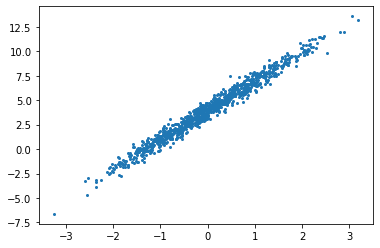

In [3]:
X = np.random.randn(1000)
y = 4 + 3 * X + .5*np.random.randn(1000)

plt.scatter(X, y, s=4)
plt.show()

In [4]:
Xbar = np.concatenate((np.ones((X.shape[0], 1)), X.reshape(-1, 1)), axis = 1)

w_init = np.random.rand(Xbar.shape[1])
lr = 0.1
w1, loss_hist1 = Batch_GD(w_init, Xbar, y, lr)
w1

array([3.98372122, 2.99970882])

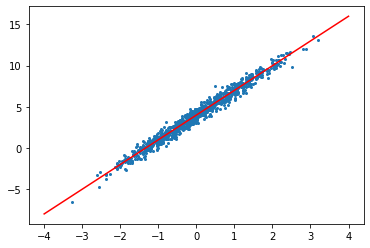

In [5]:
plt.scatter(X, y, s=4)
X0 = np.linspace(-4, 4, 20)
y0 = w1[0] + w1[1]*X0
plt.plot(X0, y0, 'r')
plt.show()

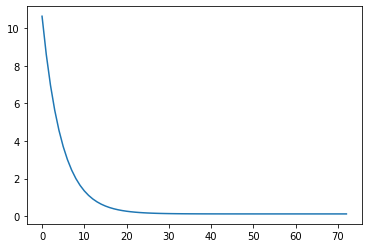

In [6]:
plt.plot(loss_hist1)
plt.show()

## 3. Stochastic Gradient Descent

In [7]:
def SGD(w_init, X, y, lr=0.1, n_epoches=100):
    w = w_init
    lost_hist = []
    N = X.shape[0]
    ep = 0
    while ep < n_epoches:
        ep += 1
        mix_ids = np.random.permutation(N)
        for i in mix_ids:
            xi = X[i]
            yi = y[i]
            w_new = w - lr*LR_grad(w, xi, yi)
        if np.linalg.norm(LR_grad(w_new, X, y))/len(w_new) < 1e-3:
            break
        w = w_new
        lost_hist.append(LR_loss(w_new, xi, yi))
    return w, lost_hist

w_init = np.random.rand(Xbar.shape[1])
w2, loss2 = SGD(w_init, Xbar, y)
w2

array([3.92751643, 3.0283947 ])

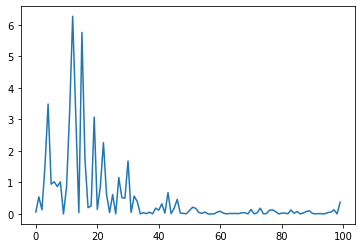

In [8]:
plt.plot(loss2)
plt.show()

## 4. Mini-batch Gradient Descent

In [9]:
def mini_BGD(w_init, X, y, lr=0.1, batch=10, n_epoches=100):
    w = w_init
    loss_hist = []
    N = X.shape[0]
    ep = 0
    while ep < n_epoches:
        ep += 1
        #Shuffle Data
        indices = np.random.permutation(N)
        X = X[indices]
        y = y[indices]
        for i in range(0, N, batch):
            X_i = X[i:i+batch]
            y_i = y[i:i+batch]
            w_new = w - lr*LR_grad(w, X_i, y_i)
        if np.linalg.norm(LR_grad(w_new, X, y))/len(w_new) < 1e-3:
            break
        w = w_new
        loss_hist.append(LR_loss(w, X, y))
    return w, loss_hist

w_init = np.random.rand(Xbar.shape[1])
w3, loss3 = mini_BGD(w_init, Xbar, y)
w3            

array([3.87831669, 3.02294552])

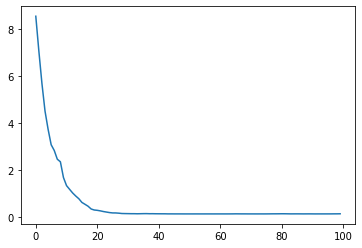

In [10]:
plt.plot(loss3)
plt.show()